In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cars.csv")

In [9]:
df.shape

(261, 8)

In [10]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [20]:
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [25]:
#Convertendo duas colunas strings para numericas
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [30]:
ind_cub = [df[df['cubicinches'].isnull()]]
ind_cub

[      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year brand
 40   16.0          6          NaN  105     3897.0          19  1976   US.
 180  19.8          6          NaN   85     2990.0          18  1980   US.]

In [31]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [91]:
media_cub = df['cubicinches'].mean()
media_wei = df['weightlbs'].mean()

In [96]:
df[df['cubicinches'].isnull()] = media_cub
df[df['weightlbs'].isnull()] = media_wei

print("Média Wightlbs: ", df['weightlbs'].mean())

Média Wightlbs:  3009.8333333333335


In [41]:
df['mpg'].median()

22.0

In [42]:
df['time-to-60'].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

In [44]:
df['cylinders'].corr(df['mpg'])

-0.7767098829879999

{'whiskers': [<matplotlib.lines.Line2D at 0x200732eb8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x200732ebf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x200732eb580>],
 'medians': [<matplotlib.lines.Line2D at 0x200732f5610>],
 'fliers': [<matplotlib.lines.Line2D at 0x200732f5970>],
 'means': []}

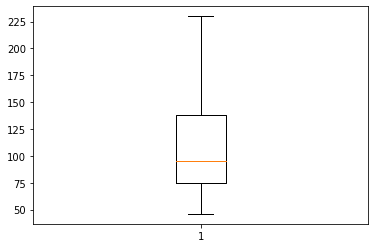

In [58]:
plt.boxplot(df['hp'])

In [99]:
from sklearn.preprocessing import StandardScaler

target = df['brand']
df_prep = df.drop('brand', axis=1)

norm = StandardScaler()
scaler = norm.fit(df_prep.values)
df_norm = scaler.transform(df_prep.values)

df_norm = pd.DataFrame(df_norm, columns=df_prep.columns)

In [100]:
df_norm.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


In [101]:
df_norm['hp'].max()

3.05870398977614

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

In [111]:
princip = pca.fit_transform(df_norm)
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


In [112]:
componentes = pd.DataFrame(princip)
componentes.head()

,0,1,2,3,4,5,6
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958


In [116]:
componentes_3 = componentes.iloc[:, :3]
componentes_3.columns = ['Comp1', 'Comp2', 'Comp3']
componentes_3.head()

,Comp1,Comp2,Comp3
0,3.485219,0.526326,-0.139738
1,-2.176912,-0.285424,-1.304613
2,2.684973,1.046946,-0.732156
3,3.534648,0.847619,-0.801334
4,-2.299222,0.194808,-0.221704


In [117]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=3)

In [118]:
clustering.fit(componentes_3)

KMeans(n_clusters=3)

In [123]:
clustering.cluster_centers_

array([[-0.49611183,  0.4969398 ,  0.28360663],
       [ 3.08082252, -0.19838979, -0.09386317],
       [-2.29851297, -0.51022343, -0.31004396]])

In [128]:
n_labels = pd.DataFrame()
n_labels['Labels'] = clustering.labels_
n_labels.value_counts()

Labels
0         109
2          77
1          75
dtype: int64